In [1]:
using LinearAlgebra
using Distributions
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [2]:
using DataFrames
using CSV

In [3]:
using Revise
using Newtrinos
using Newtrinos.osc

[ Info: Precompiling Newtrinos [5b289081-bab5-45e8-97fc-86872f1653a0] (cache misses: include_dependency fsize change (2), wrong dep version loaded (2))
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0x5ce386586f5e9b6e, 0x791709080acc7673, 0x47cdd8d23646e756, 0x1b41ced7cb8589db, 0x26dfb924451a39d8, 0x1695c86c2f2332ad, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())


In [4]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
  [336ed68f] CSV v0.10.15
⌅ [13f3f980] CairoMakie v0.13.6
⌃ [7073ff75] IJulia v1.27.0
⌅ [a98d9a8b] Interpolations v0.15.1
  [5b289081] Newtrinos v0.0.1 `~/Newtrinos.jl`
  [91a5bcdd] Plots v1.40.17
⌃ [295af30f] Revise v3.7.5
⌃ [3cd96dde] UnROOT v0.8.20
Info Packages marked with ⌃ and ⌅ have new versions available. Those with ⌃ may be upgradable, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


In [5]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (m₀ = 0.1, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, N = 10.0, r = 1.0), (m₀ = Uniform{Float64}(a=0.001, b=2.0), θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), N = Uniform{Float64}(a=3.0, b=100.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#50"(), Newtrinos.osc.var"#osc_prob#43"{Newtrinos.osc.var"#osc_prob#41#44"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#41#44"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}(OscillationC

In [6]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics = (; osc, atm_flux, earth_layers);

In [7]:
experiments = (

   juno= Newtrinos.juno.configure(physics),
);

[ Info: Loading juno data


In [8]:
p = Newtrinos.get_params(experiments)

(N = 10.0, juno_accidental_norm = 1.0, juno_atmnc_norm = 1.0, juno_co_norm = 1.0, juno_detection_epsilon = 1.0, juno_fast_neutron_norm = 1.0, juno_geo_rate_norm = 1.0, juno_geo_shape_eps = 0.0, juno_lihe_norm = 1.0, juno_res_a = 0.0261, juno_res_b = 0.0082, juno_res_c = 0.0123, juno_world_reactor_norm = 1.0, junotao_energy_scale = 1.0, junotao_flux_scale = 1.0, junotao_shape_eps = 0.0, m₀ = 0.1, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [9]:
asimov_data= Newtrinos.generate_asimov_data(experiments.juno, p)
asimov_data = Float64.(asimov_data)

[ Info: Poisson-based model. Rounding Asimov data to nearest integer.


376-element Vector{Float64}:
  65.0
  89.0
 121.0
 155.0
 193.0
 228.0
 257.0
 283.0
 306.0
 326.0
 346.0
 361.0
 373.0
   ⋮
   5.0
   5.0
   5.0
   5.0
   5.0
   5.0
   5.0
   5.0
   4.0
   4.0
   4.0
   4.0

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


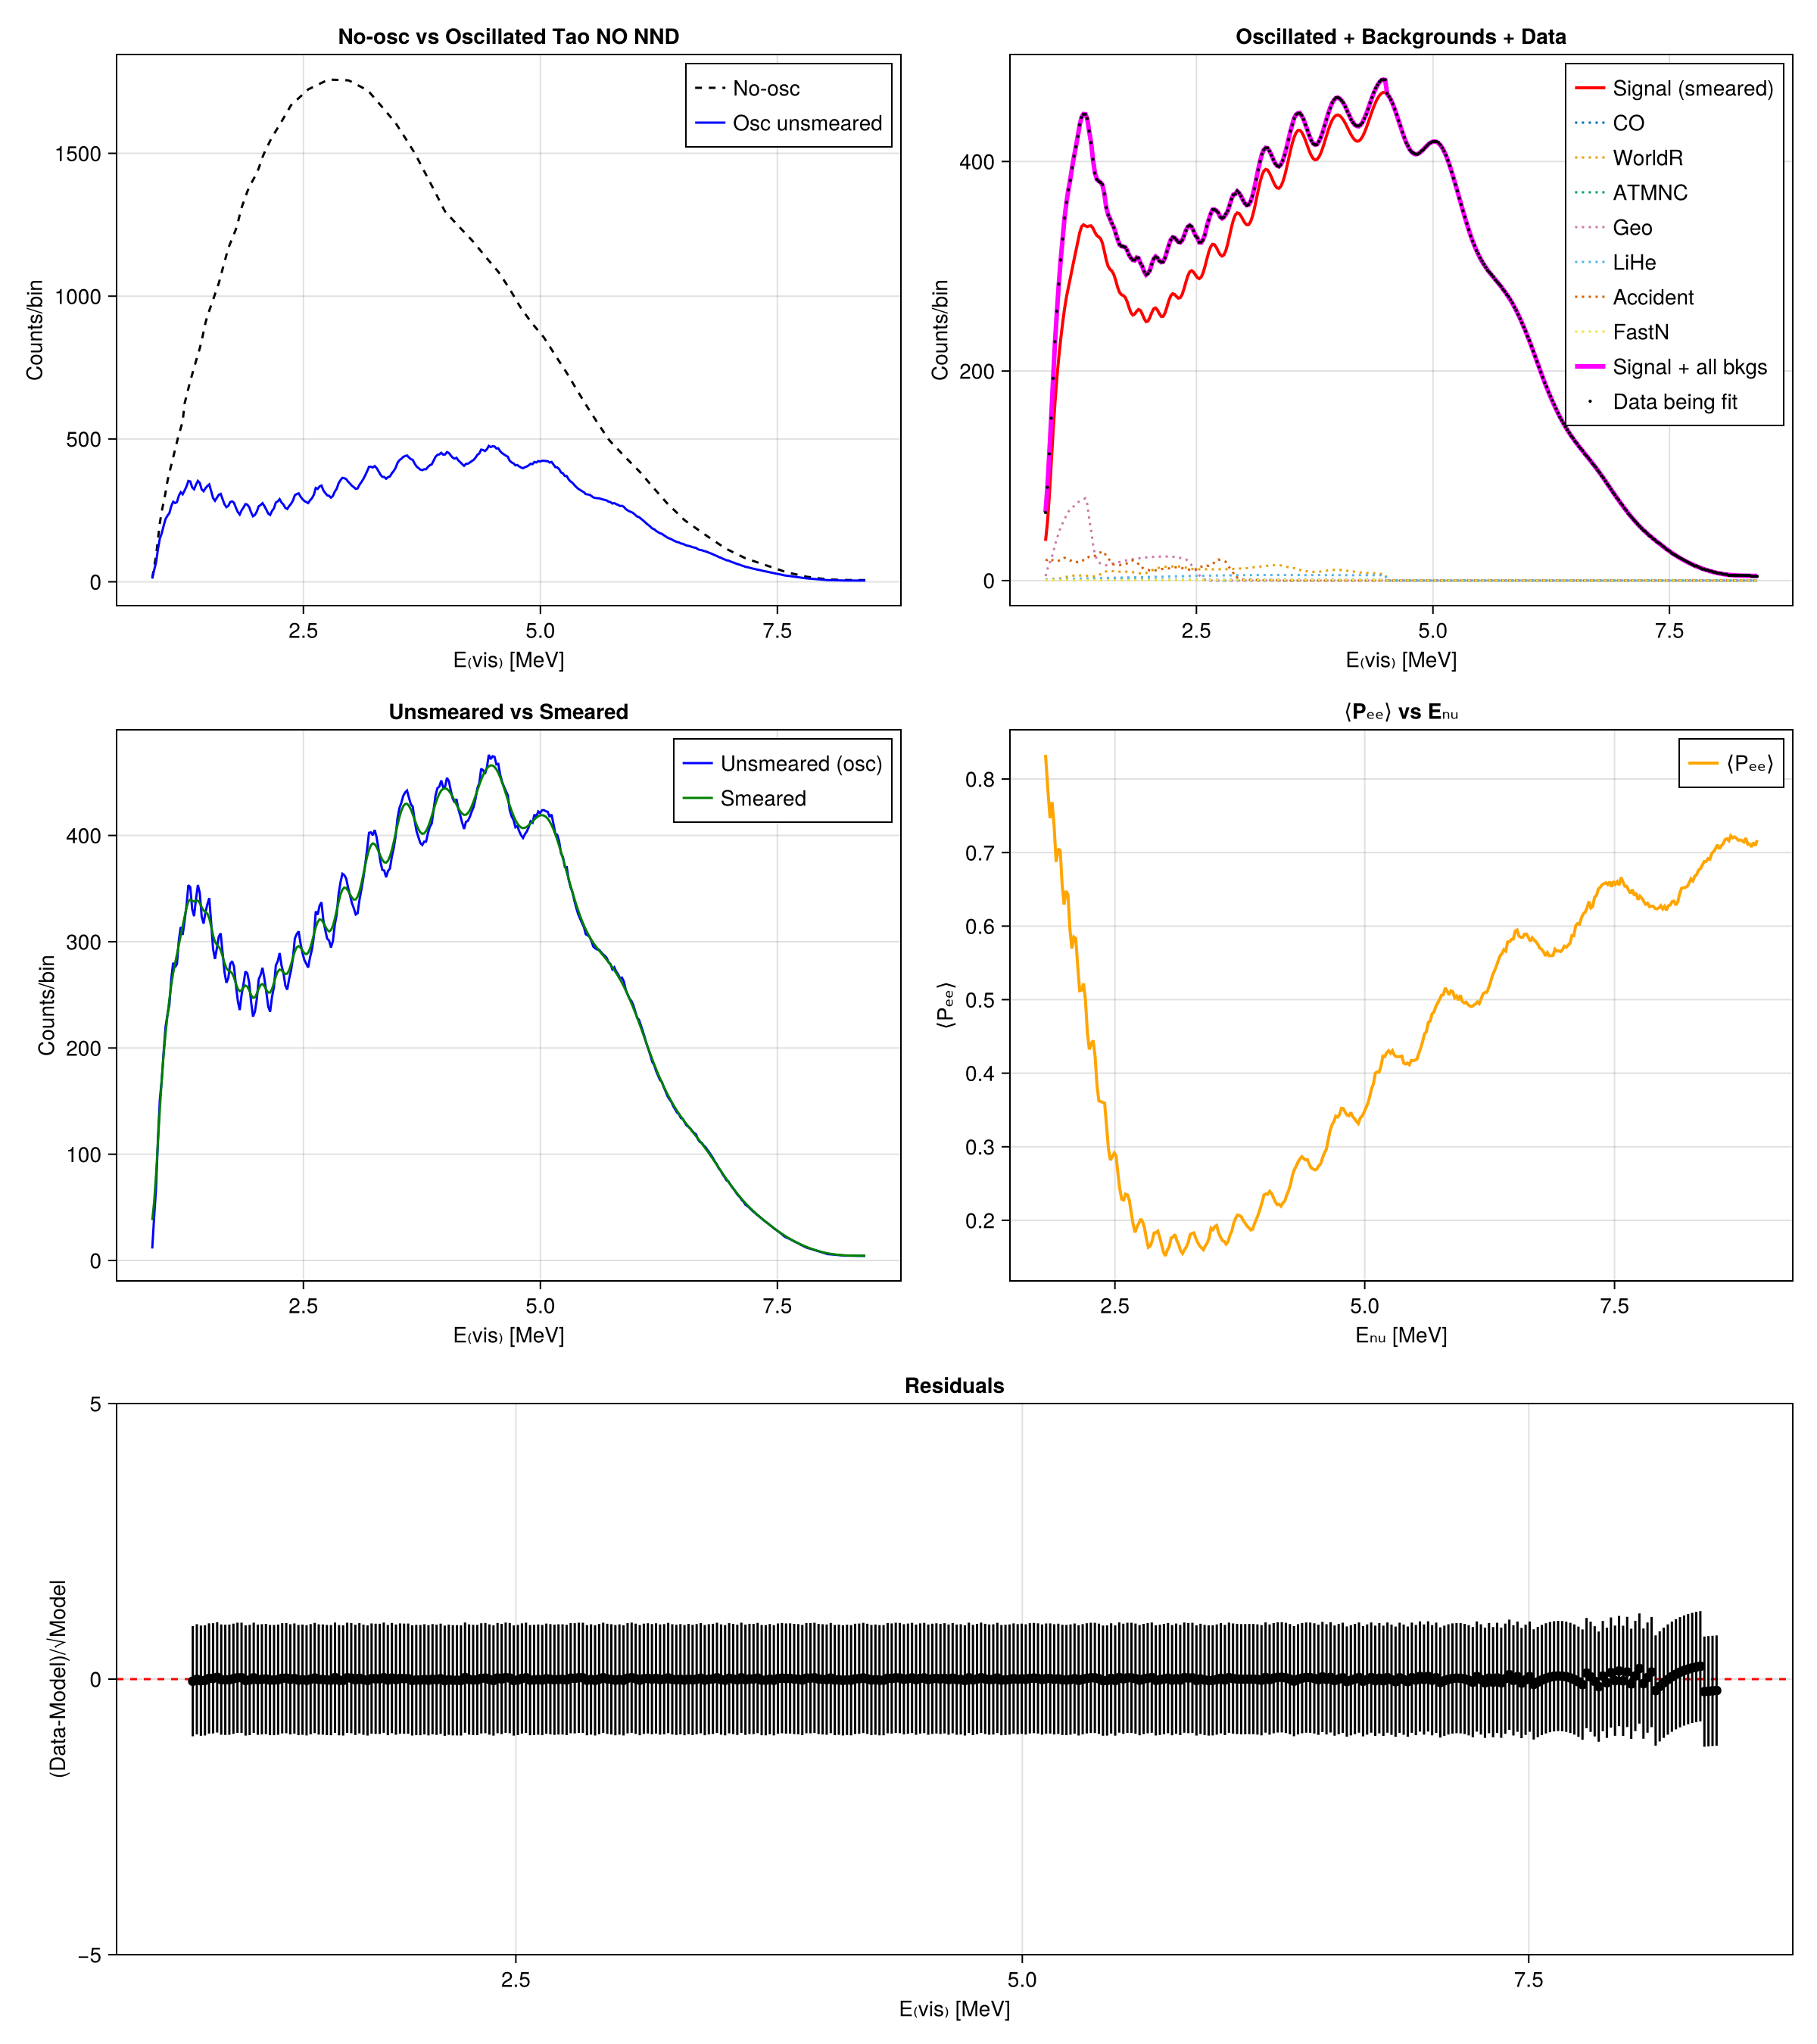

In [10]:
data_to_plot= asimov_data #CSV.read("/home/sofialon/Newtrinos.jl/src/experiments/juno/juno_NO_observed.csv", DataFrame; select=[2])[:, 1]
img = experiments.juno.plot(p; data_to_plot,title_suffix="Tao NO NND" )
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/profiled plot/juno/juno_data_NND.png", img)

In [35]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (r=31,N=31)  

modified_priors = (
    N = all_priors.N,
    m₀ =p.m₀,
    r = all_priors.r,
    
   
  

    Δm²₂₁ = p.Δm²₂₁,  
    Δm²₃₁ =all_priors.Δm²₃₁ , 
    δCP = p.δCP,    
    θ₁₂ = p.θ₁₂,    
    θ₁₃= all_priors.θ₁₃,       
    θ₂₃ = p.θ₂₃   
    

)


(N = Uniform{Float64}(a=3.0, b=100.0), m₀ = 0.1, r = Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [36]:
asimov_data= Newtrinos.generate_asimov_data(experiments.juno, p)
asimov_data = Float64.(asimov_data)

[ Info: Poisson-based model. Rounding Asimov data to nearest integer.


376-element Vector{Float64}:
  65.0
  89.0
 121.0
 155.0
 193.0
 228.0
 257.0
 283.0
 306.0
 326.0
 346.0
 361.0
 373.0
   ⋮
   5.0
   5.0
   5.0
   5.0
   5.0
   5.0
   5.0
   5.0
   4.0
   4.0
   4.0
   4.0

In [37]:
toy_data = Newtrinos.generate_toy_data(experiments.juno, p)
toy_data = Float64.(toy_data)
toy_data = (juno = toy_data,)

(juno = [58.0, 86.0, 112.0, 164.0, 208.0, 220.0, 254.0, 321.0, 293.0, 361.0  …  2.0, 8.0, 3.0, 6.0, 3.0, 5.0, 5.0, 2.0, 2.0, 4.0],)

In [38]:

likelihood = Newtrinos.generate_likelihood(experiments, toy_data);


In [ ]:

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)

Progress:  15%|██████▎                                  |  ETA: 0:18:31

In [ ]:
JLD2.@save "scan_juno_rN_10_NND_m0=0.1_toy.jld2" result

In [ ]:
using CairoMakie

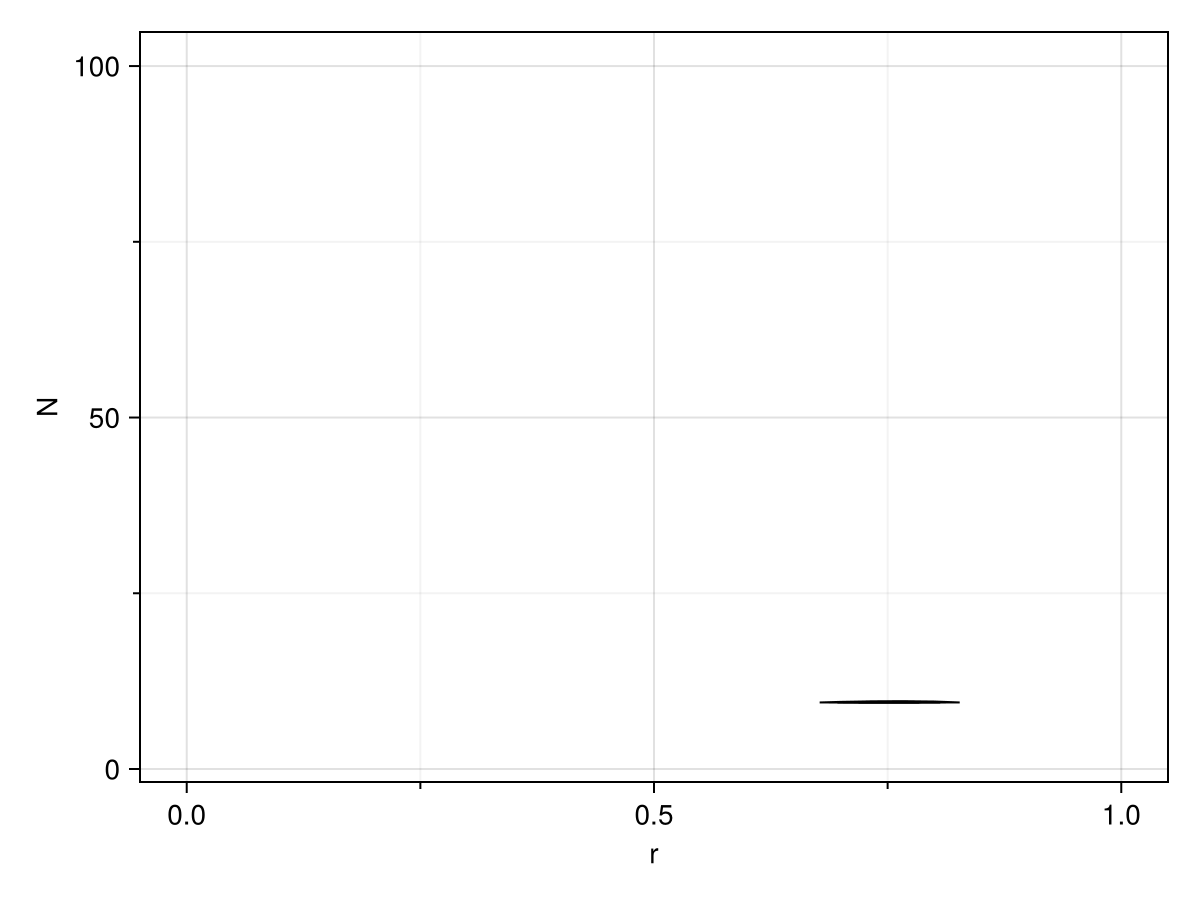

In [ ]:
img = CairoMakie.plot(result)
#display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/profiled plot/juno/scan_juno_rN_45_NND_m0=0.1.png", img)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


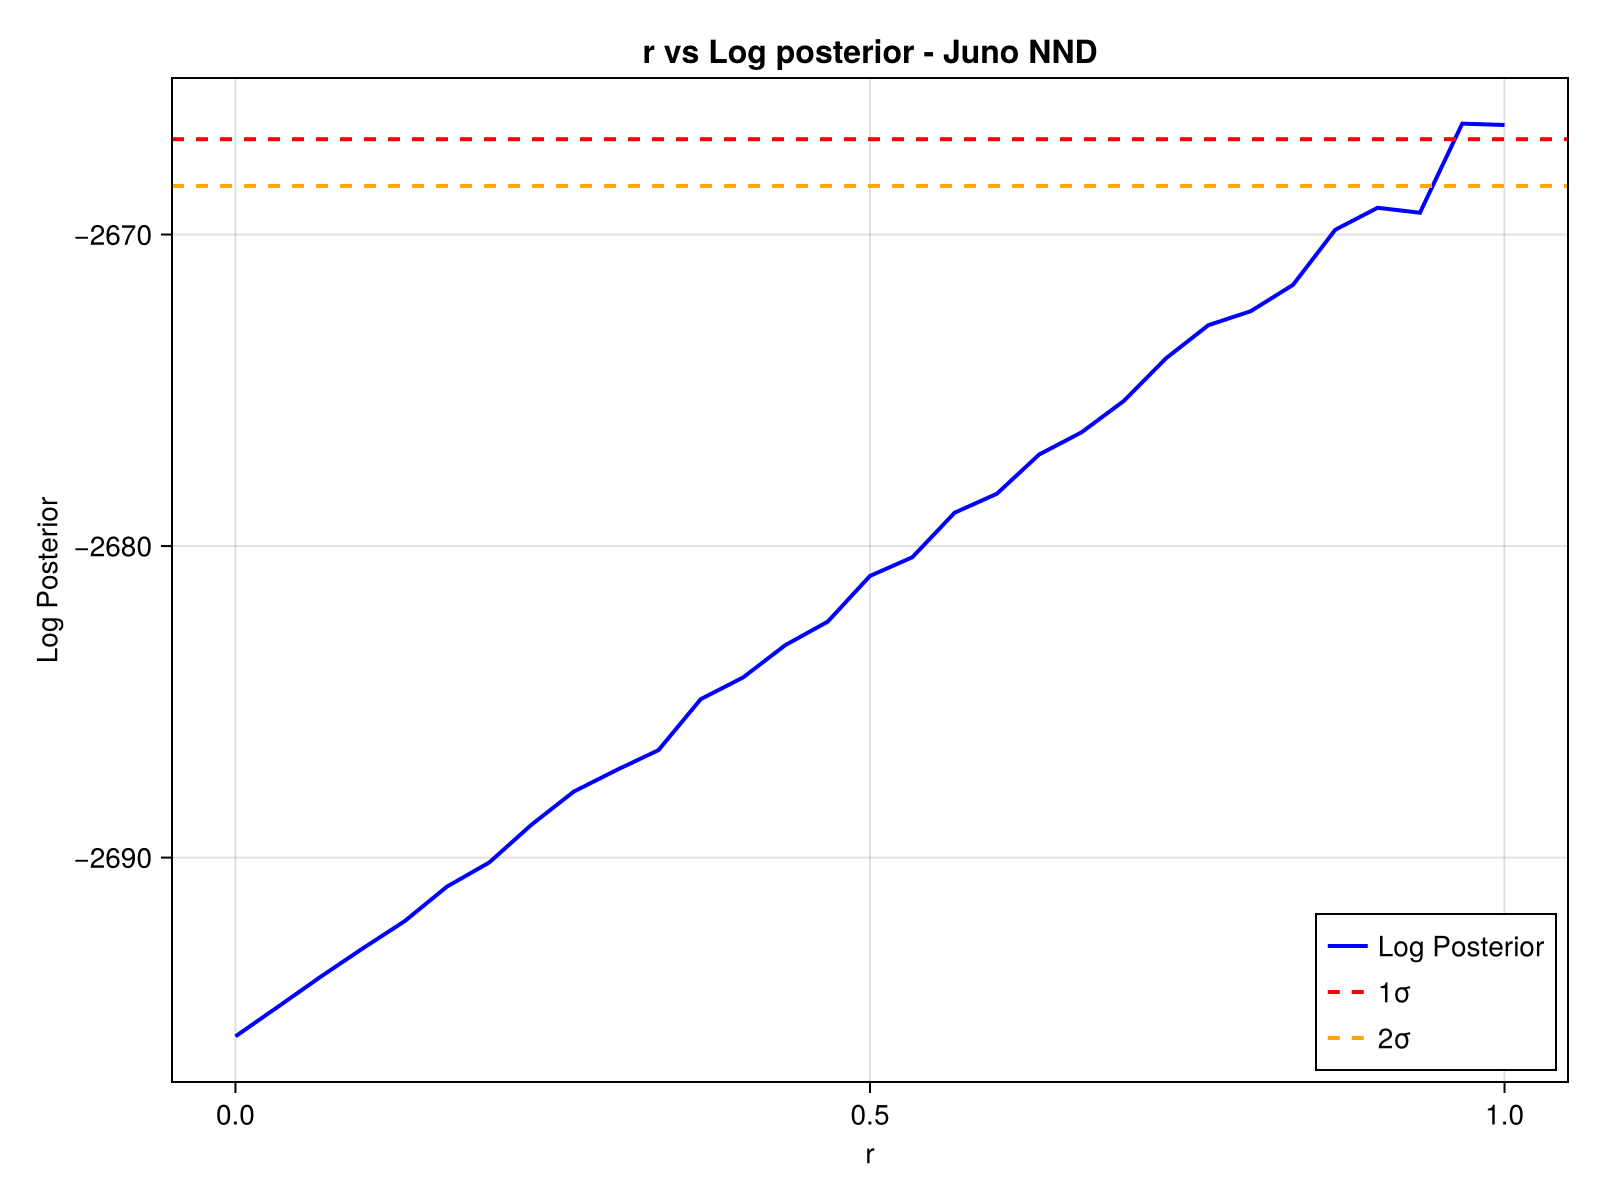

In [21]:
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[:, 25]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[:, 25]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "r",
    ylabel = "Log Posterior",
    title = "r vs Log posterior - Juno NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.r, result.values.log_posterior[:, 25],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/profiled plot/juno/juno_rLogpost_N=36_m0=0.1_NND.png", fig)


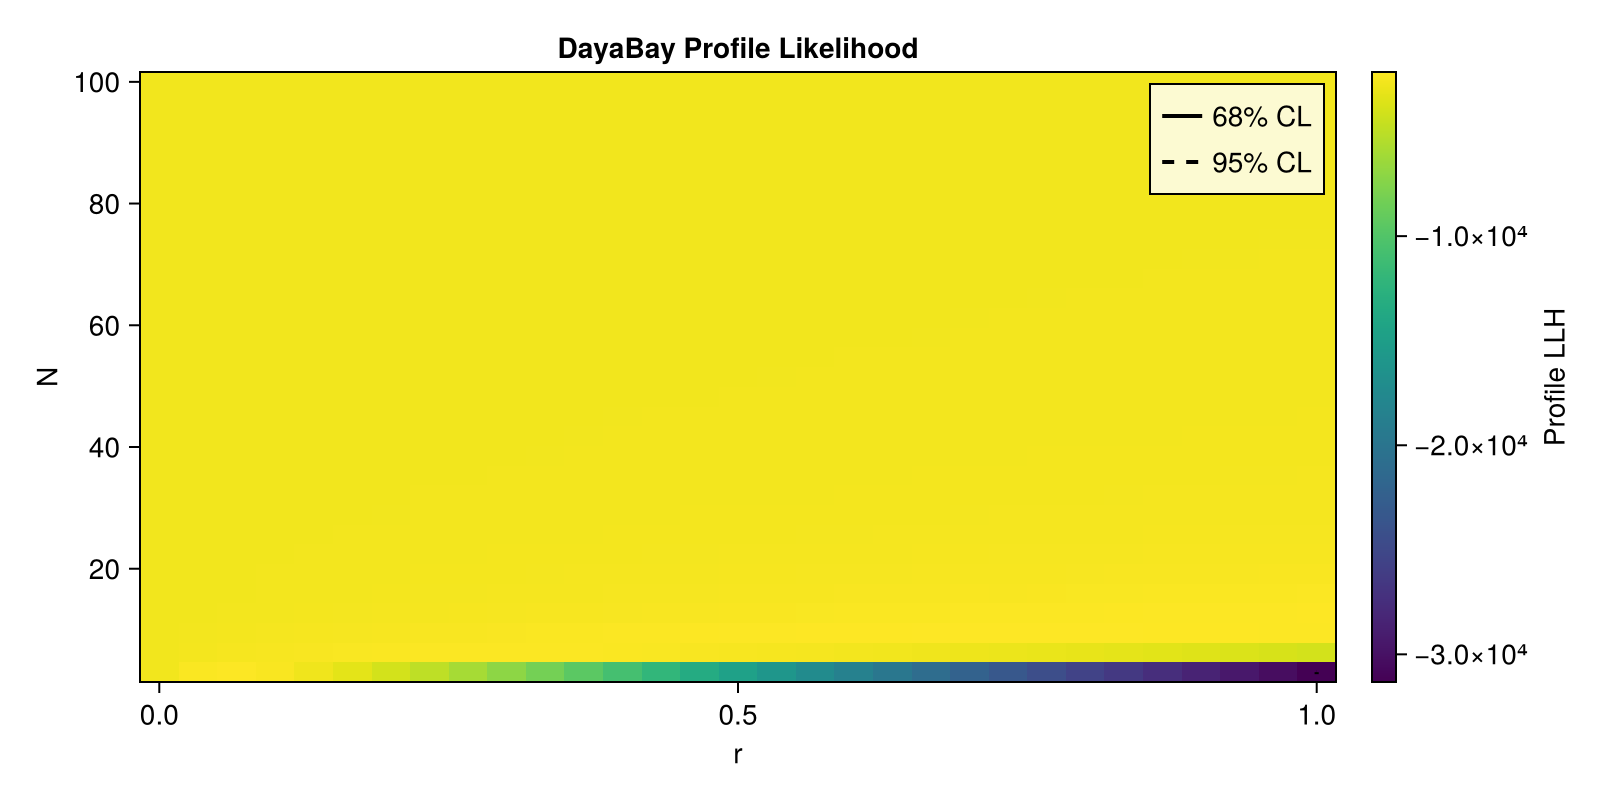

In [22]:
llh_data = Float64.(result.values.llh)

fig = Figure(size=(800, 400))

ax = Axis(fig[1,1], 
    xlabel=String(keys(result.axes)[1]), 
    ylabel=String(keys(result.axes)[2]), 
    title="DayaBay Profile Likelihood"
)

hm = CairoMakie.heatmap!(ax, result.axes[1], result.axes[2], result.values.llh)

# Find minimum LLH value (best fit point)
min_llh = minimum(llh_data)

# Calculate contour levels for 68% and 95% confidence (for 2 parameters)
contour_68 = min_llh + 1.15  # 2.30/2
contour_95 = min_llh + 2.995  # 5.99/2

# Add contour lines separately (this avoids the linestyle array issue)
CairoMakie.contour!(ax, result.axes[1], result.axes[2], result.values.llh, 
         levels=[contour_68], color=:black, linewidth=2)
CairoMakie.contour!(ax, result.axes[1], result.axes[2], result.values.llh, 
         levels=[contour_95], color=:black, linewidth=2, linestyle=:dash)

# Add legend for contour lines
lines!(ax, [NaN], [NaN], color=:black, linewidth=2, label="68% CL")
lines!(ax, [NaN], [NaN], color=:black, linewidth=2, linestyle=:dash, label="95% CL")
axislegend(ax, position=:rt, backgroundcolor=(:white, 0.8))

Colorbar(fig[1,2], hm, label="Profile LLH")

#save("/home/sofialon/Newtrinos.jl/natural plot/dayabay/dayabay_rm₀_NNM_profN.png", fig)
fig

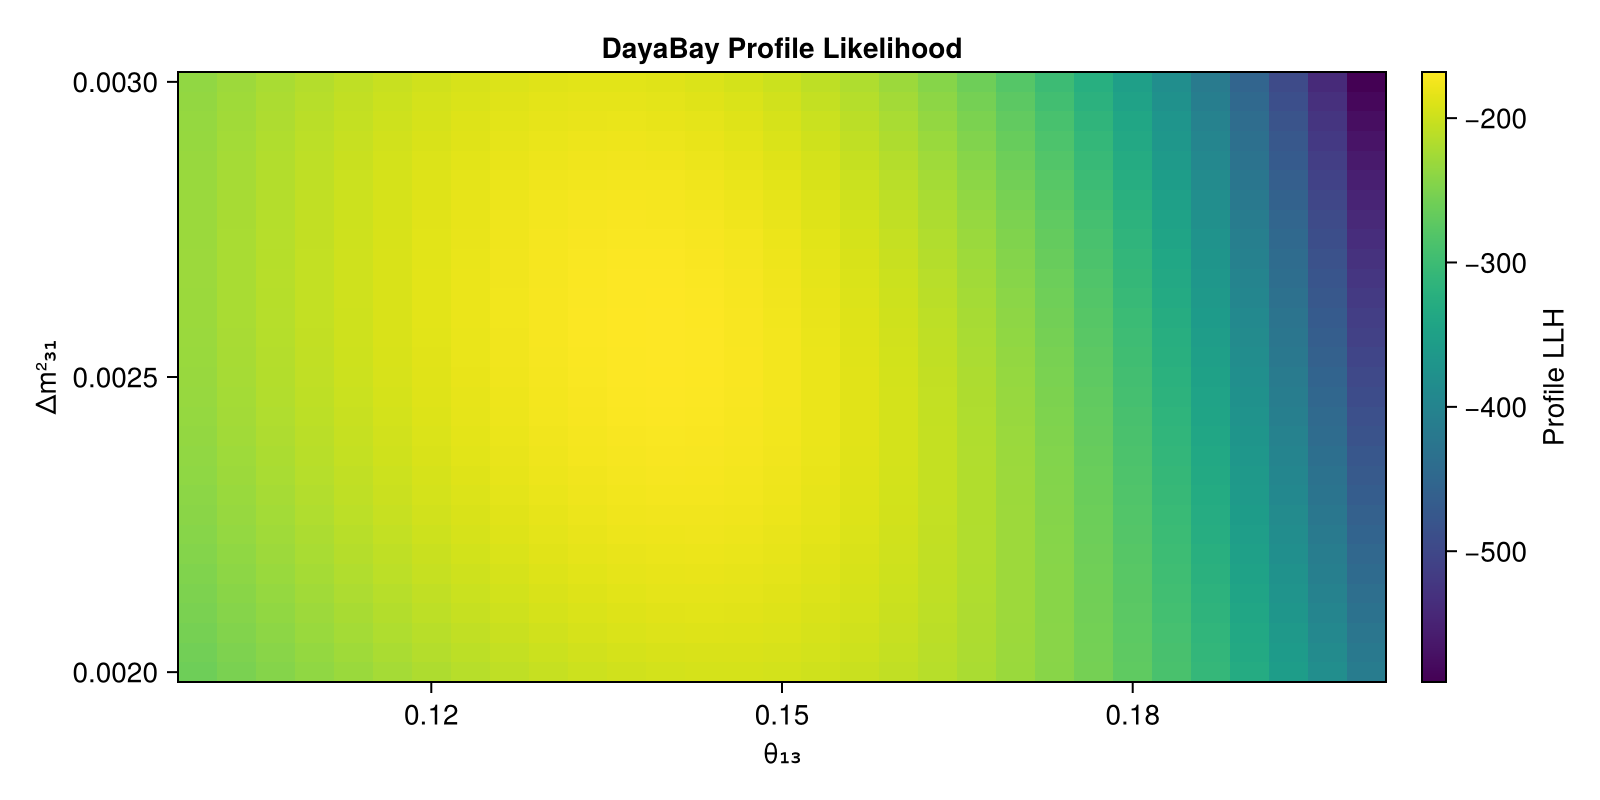

In [ ]:
llh_data = Float64.(result.values.llh)


fig = Figure(size=(800, 400))

ax = Axis(fig[1,1], 
    xlabel=String(keys(result.axes)[1]), 
    ylabel=String(keys(result.axes)[2]), 
    title="DayaBay Profile Likelihood"
)

hm = CairoMakie.heatmap!(ax, result.axes[1], result.axes[2], result.values.llh)
Colorbar(fig[1,2], hm, label="Profile LLH")

#save("/home/sofialon/Newtrinos.jl/natural_plot/dayabay_rN_NND_profthetadeltam_.png", fig)
fig

Likelihood ratio test


In [ ]:
JLD2.@load "scan_dayabay_thetadeltam_SM.jld2" result
ll_0 = result.values.llh

JLD2.@load "scan_dayabay_thetadeltam_NND_profN.jld2" result
ll_1 = result.values.llh

pvalue =Newtrinos.likelihood_ratio_test(ll_0,ll_1, 2)

ll_0: Any[-302.4716069851248 -299.3814874105783 -296.4203722706933 -293.59234495586077 -290.9012228039638 -288.35056712385074 -285.94369439814386 -283.68368793802586 -281.57340928265756 -279.61550867771734 -277.81243402826044 -276.16643779754367 -274.67958141218804 -273.35373683184406 -272.1905850449926 -271.19161135872866 -270.35809745648305 -269.69111030125646 -269.19148806087566 -268.8598233242585 -268.6964439622668 -268.70139206213855 -268.8744014299001 -269.21487420974427 -269.7218572126701 -270.39401857825914 -271.22962541301723 -272.22652305612775 -273.38211661851614 -274.6933554238578 -276.1567209506018; -292.6154096192527 -289.4012557669376 -286.3225331994417 -283.38344656945026 -280.58792640021977 -277.93964176186483 -275.4420141000042 -273.09823138122744 -270.9112617484946 -268.88386593278574 -267.0186077414477 -265.3178620348856 -263.78381970757397 -262.4184893028572 -261.22369500996587 -260.2010709126542 -259.35205147876366 -258.67785839617017 -258.1794839707194 -257.85767

1.0

Oscillations


In [ ]:

# STANDARD MODEL
E_range = range(0.002, 0.04, length=1000) 
L=1.663
L_vec = [L]

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc_SM = Newtrinos.osc.configure(osc_cfg_SM)
 

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics_SM = (; osc=osc_SM, atm_flux, earth_layers);


experiments_SM = (
 
    dayabay = Newtrinos.dayabay.configure(physics_SM),
);

p_SM = Newtrinos.get_params(experiments_SM)

osc_prob_SM = Newtrinos.osc.get_osc_prob(osc_cfg_SM)


probab_SM = osc_prob_SM(collect(E_range), L_vec, p; anti=true)

[ Info: Loading dayabay data


1000×1×3×3 Array{Float64, 4}:
[:, :, 1, 1] =
 0.9717520812960653
 0.9683109007040173
 0.9648651711561107
 0.9614516539986672
 0.9581006425040238
 0.954836715800887
 0.9516794498955481
 0.948644075884838
 0.9457420805008407
 0.9429817476633987
 0.94036864212353
 0.9379060378509995
 0.9355952947774657
 ⋮
 0.9985934515549718
 0.9985961358673033
 0.9985988125173264
 0.9986014815341185
 0.9986041429466216
 0.9986067967836391
 0.9986094430738394
 0.9986120818457556
 0.9986147131277864
 0.998617336948196
 0.9986199533351169
 0.9986225623165482

[:, :, 2, 1] =
 0.005418083717743282
 0.006640561788994135
 0.007947011695303933
 0.009315085502218932
 0.01072495802678424
 0.012159222438124659
 0.013602747738296124
 0.015042513386734001
 0.016467432457965777
 0.017868171654777297
 0.019236974100273762
 0.02056748897953614
 0.02185461068877964
 ⋮
 0.000857674820230858
 0.0008560528141375867
 0.0008544353946927165
 0.0008528225446588595
 0.0008512142468793375
 0.000849610484277723
 0.0008480112398574

In [ ]:
# NNATURALNESS WITH DIFFERENT N 


osc_prob = Newtrinos.osc.get_osc_prob(osc_cfg)

p= Newtrinos.get_params(experiments)
p_5 = merge(p, (N = ftype(5),))
p_10 = merge(p, (N = ftype(10),))
p_20 = merge(p, (N = ftype(20),))
p_50 = merge(p, (N = ftype(50),))

probab_5 = osc_prob(collect(E_range), L_vec, p_5; anti=true)
probab_10 = osc_prob(collect(E_range), L_vec, p_10; anti=true)
probab_20 = osc_prob(collect(E_range), L_vec, p_20; anti=true)
probab_50 = osc_prob(collect(E_range), L_vec, p_50; anti=true)

p_0 = merge(p, (r = ftype(0),))
p_025 = merge(p,  (r = ftype(0.25),))
p_05 = merge(p,  (r = ftype(0.5),))
p_1 = merge(p,  (r = ftype(1),))


probab_0 = osc_prob(collect(E_range), L_vec, p_0; anti=true)
probab_025 = osc_prob(collect(E_range), L_vec, p_025; anti=true)
probab_05 = osc_prob(collect(E_range), L_vec, p_05; anti=true)
probab_1 = osc_prob(collect(E_range), L_vec, p_1; anti=true)


1000×1×60×60 Array{Float64, 4}:
[:, :, 1, 1] =
 0.9653226249905913
 0.9611882782619173
 0.9500975451343341
 0.9535741886062796
 0.9498285563185095
 0.9459732769318663
 0.9394156365487897
 0.9410911922988664
 0.9306486495672355
 0.9369127662561983
 0.9286764949273513
 0.9272807183113962
 0.9290864579706793
 ⋮
 0.9896505630663285
 0.9886410050933906
 0.9930135323270126
 0.9875756074337605
 0.9911109093060696
 0.9905141273066507
 0.9872769043733304
 0.9942904117521427
 0.9873048813544126
 0.9910651315549858
 0.9941405075887495
 0.9892767789722164

[:, :, 2, 1] =
 0.005246779416692774
 0.006526313541907839
 0.007790607309456805
 0.009272017924062173
 0.010592690555405028
 0.011817273698287119
 0.0135699425066104
 0.014832274307520998
 0.016422316074943558
 0.017658824872447444
 0.018529242239249198
 0.01985697060774499
 0.02151490481368399
 ⋮
 0.0008690652250467455
 0.0008075766904750733
 0.0009486236055820658
 0.0008307999931415824
 0.0008250820447786812
 0.0008373533678919056
 0.00084040

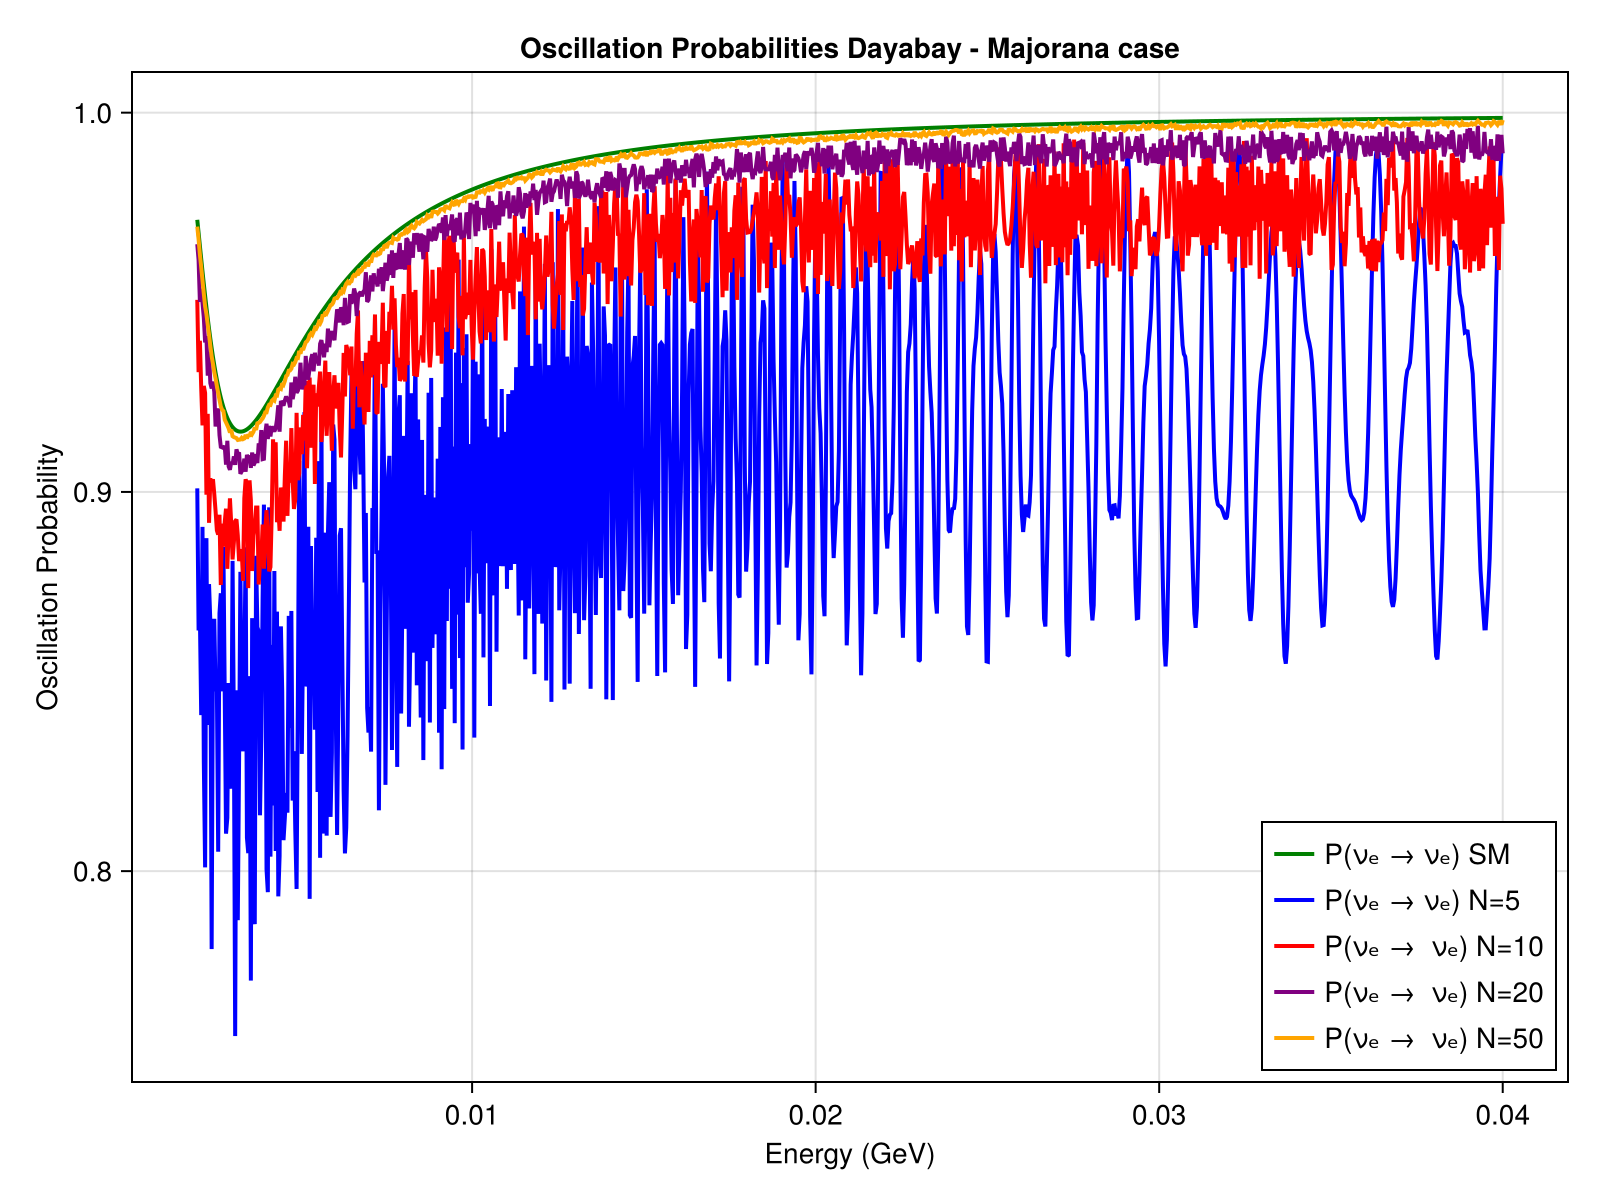

In [ ]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "P(ν̄ₑ → ν̄ₑ)", 
    title = "Oscillation Probabilities Dayabay - Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1,1], label="SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_5[:, 1, 1,1], label=" N=5", linewidth=2, color=:blue)
lines!(ax, E_range, probab_10[:, 1, 1,1], label="N=10", linewidth=2, color=:red)
lines!(ax, E_range, probab_20[:, 1,1,1], label=" N=20", linewidth=2, color=:purple)
lines!(ax, E_range, probab_50[:, 1,1,1], label=" N=50", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural_plot/osc_dayabay_N_majorana.png", fig)

fig

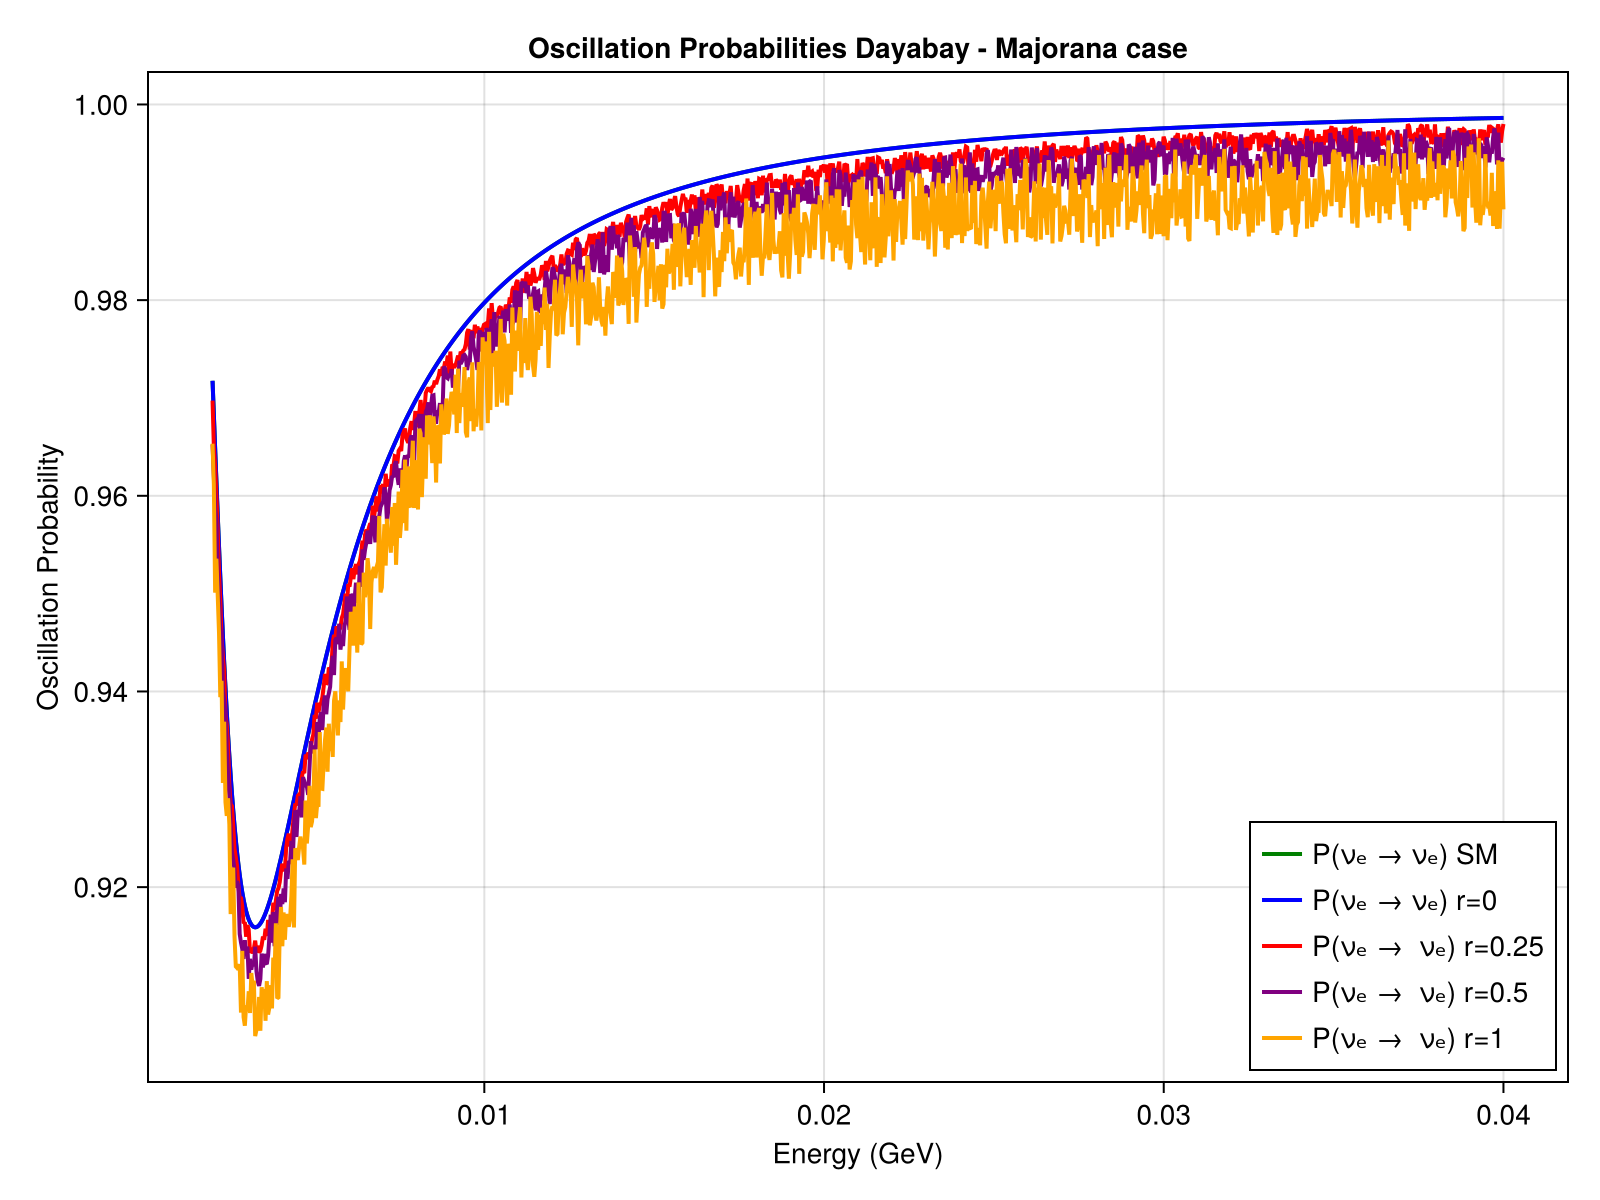

In [ ]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Dayabay - Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1, 1], label="P(νₑ → νₑ) SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_0[:, 1, 1, 1], label="P(νₑ → νₑ) r=0", linewidth=2, color=:blue)
lines!(ax, E_range, probab_025[:, 1, 1, 1], label="P(νₑ →  νₑ) r=0.25", linewidth=2, color=:red)
lines!(ax, E_range, probab_05[:, 1, 1, 1], label="P(νₑ →  νₑ) r=0.5", linewidth=2, color=:purple)
lines!(ax, E_range, probab_1[:, 1, 1, 1], label="P(νₑ →  νₑ) r=1", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural_plot/osc_dayabay_r_majorana.png", fig)

fig